#### **Name: Rafia Ahsan**

## **Objective:**


In this project, the problem of limited datasets is addressed as the limited dataset causes significant challenges for training a machine learning model. The aim of this project is to check the classification accuracy of CNN on limited dataset and to augment dataset using GAN to improve its accuracy.

Initially a classification task was performed to classify the images of cows and horses using CNN on limited dataset. Then GAN was employed to generate realistic and synthetic images that closely resemble real data, thereby mitigating the limitations imposed by data scarcity. In the end newly generated data was used to again perform classification task using CNN in order to improve its classification accuracy.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **1st Part Classification with pytorch on Real Data**

In this part, a classification task was performed on limited dataset by emplying CNN model.

In [ ]:
import torch
import os
import torch.nn as nn
import torchvision
import torch.optim as optim
import numpy as np
from torchsummary import summary
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

## **Dataset:**

For this image classification task, limited dataset was available with two classes: cows and horses (two categories each).


     Classes                    Horse        Cow
     Total Image Samples         82           82

In total 164 images were available in datset to perform classification. For training one category of of cow and horse was selected resulting in total 82 images in training set (41 images for each class).

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

### **Data Loading & Generting Label**

**Generating Labels**

For supervised learning task, ML algorithms use labeled datasets to train algorithms, to predict outcomes and recognize patterns.

For the CNN classification task, label 0 was assigned to the class 'cow,' and label 1 was assigned to the class 'horse,' enabling binary classification between these two classes.

**Normalization**

Initially the pixels of images were in range [0, 255]. So to reduce model complexity and to enhance training stability all the images were normalized between the range [0, 1].

In [ ]:
train_data_dir = '/content/drive/MyDrive/MV/Data/Train'
classes = ['Cow', 'Horse']
train_images = []
train_labels = []

for i, class_name in enumerate(classes):
    class_dir = os.path.join(train_data_dir, class_name)
    for image_name in os.listdir(class_dir):
        image = Image.open(os.path.join(class_dir, image_name))
        image = np.array(image)
        train_images.append(image)
        train_labels.append(i)

# Convert to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
test_data_dir = '/content/drive/MyDrive/MV/Data/Test'
classes = ['Cow', 'Horse']

test_images = []
test_labels = []

for i, class_name in enumerate(classes):
    class_dir = os.path.join(test_data_dir, class_name)
    for image_name in os.listdir(class_dir):
        image = Image.open(os.path.join(class_dir, image_name))
        image = np.array(image)
        test_images.append(image)
        test_labels.append(i)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
batch_size = 64

# Convert images to PyTorch tensors and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = CustomDataset(train_images, train_labels, transform=transform)
test_dataset = CustomDataset(test_images, test_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size, shuffle=True)

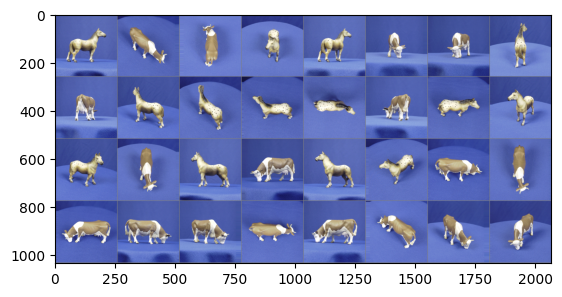

Horse Cow   Cow   Horse Horse Cow   Cow   Horse Cow   Horse Horse Horse Horse Cow   Horse Horse Horse Cow   Horse Cow   Horse Horse Cow   Cow   Cow   Cow   Cow   Cow   Cow   Cow   Cow   Cow  


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

##**CNN Architecture**


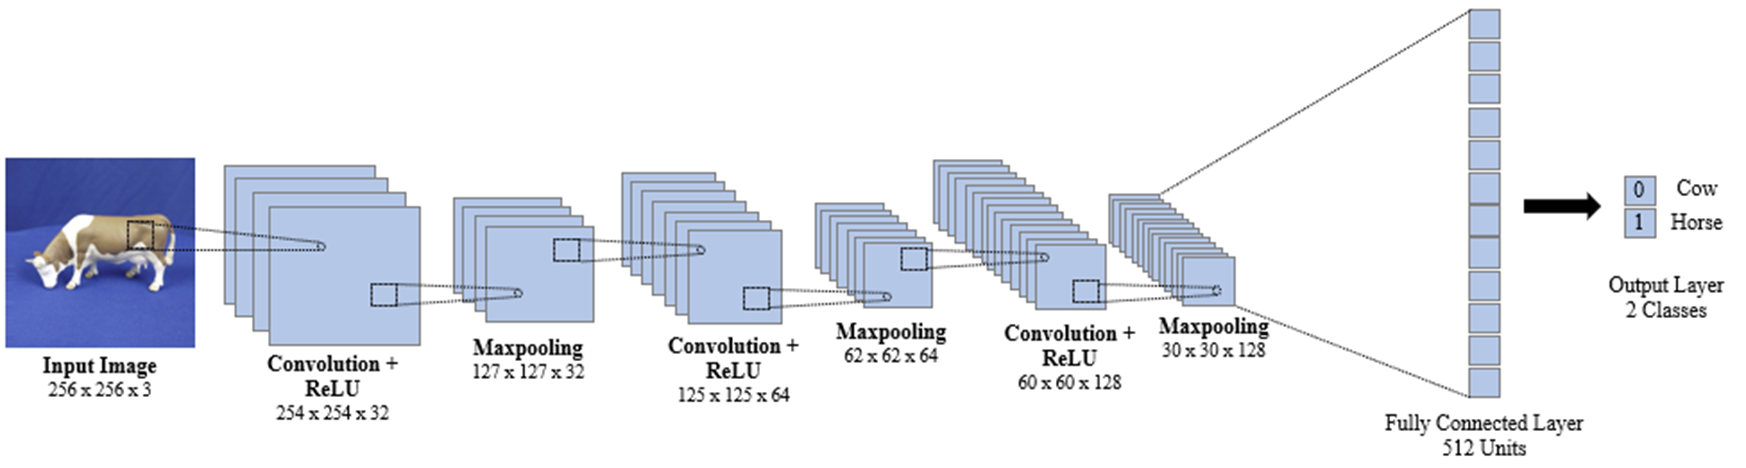

*   The input layer takes the images with dimensions of 256 x 256 x 3, which is then followed by a convolution layer with ReLU activation function and a 2D max-pooling layer. Three such block were added with different number of filters for both convolution and max-pooling layer in the CNN architecture.

*   Then a 1D Flatten layer is added to flatten the input feature map and to prepare the data for processing by the fully connected layers.

*   The first dense layer consists of 512 units and uses the ReLU activation function to perform feature processing.

*   Finally, the output layer is a linear layer with a single unit and a sigmoid activation function that facilitates binary classification for distinguishing cows and horses.


In [ ]:
# Define the CNN architecture in PyTorch
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.relu1 = nn.ReLU()
        #self.dropout = nn.Dropout(0.6)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.relu2 = nn.ReLU()
        #self.dropout = nn.Dropout(0.5)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(128 * 30 * 30, 512)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(0.7)
        self.fc2 = nn.Linear(512, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool1((self.relu1(self.conv1(x))))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = x.view(-1, 128 * 30 * 30)
        x = self.dropout(self.relu4(self.fc1(x)))
        x = self.sigmoid(self.fc2(x))
        return x

In [ ]:
# Initialize the model
model = CNN()

In [ ]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=115200, out_features=512, bias=True)
  (relu4): ReLU()
  (dropout): Dropout(p=0.7, inplace=False)
  (fc2): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
summary(model, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 254, 254]             896
              ReLU-2         [-1, 32, 254, 254]               0
         MaxPool2d-3         [-1, 32, 127, 127]               0
            Conv2d-4         [-1, 64, 125, 125]          18,496
              ReLU-5         [-1, 64, 125, 125]               0
         MaxPool2d-6           [-1, 64, 62, 62]               0
            Conv2d-7          [-1, 128, 60, 60]          73,856
              ReLU-8          [-1, 128, 60, 60]               0
         MaxPool2d-9          [-1, 128, 30, 30]               0
           Linear-10                  [-1, 512]      58,982,912
             ReLU-11                  [-1, 512]               0
          Dropout-12                  [-1, 512]               0
           Linear-13                    [-1, 1]             513
          Sigmoid-14                   

####**Hyperparameters**

**Loss:** Binary Cross Entropy is used as it compares the predicted probability with its label for binary case and generates a loss.

In [ ]:
# loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

###**Training**

For training the model, early stopping is used to avoid overfitting and model was trained for 20 epochs.

In [ ]:
# for early stopping
best_test_loss = float('inf')
patience = 3  # Number of epochs to wait if test loss stops decreasing
counter = 0  # Counter for how many epochs test loss has not decreased

train_losses = []
test_losses = []

num_epochs = 20
for epoch in range(num_epochs):
    train_loss = 0.0
    model.train()  # Set the model to training mode
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.float().unsqueeze(1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)

    # Test the model
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.float().unsqueeze(1))
            test_loss += loss.item() * images.size(0)

    # Calculate average losses
    train_loss = train_loss / len(train_loader.dataset)
    test_loss = test_loss / len(test_loader.dataset)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # Check for early stopping
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Test loss has not decreased for {} epochs. Early stopping...".format(patience))
            break


Epoch 1/20, Train Loss: 0.8259, Test Loss: 0.6422
Epoch 2/20, Train Loss: 0.6127, Test Loss: 0.6631
Epoch 3/20, Train Loss: 0.3786, Test Loss: 0.7802
Epoch 4/20, Train Loss: 0.2241, Test Loss: 0.7386
Test loss has not decreased for 3 epochs. Early stopping...


Model was trained for 20 epochs but due to early stopping, the training stopped after 4 epochs (to avoid overfitting).

###**Train Loss**

The train-test loss plot shows that with the number of epochs training loss decreases but the model causes overfitting so the training was stopped after 4 epochs.

##**Evaluation**

In [ ]:
PATH = '/content/drive/MyDrive/MV/Model/Classification.pth'
torch.save(model.state_dict(), PATH)

Visualization of test images that are completely unseen to the model.

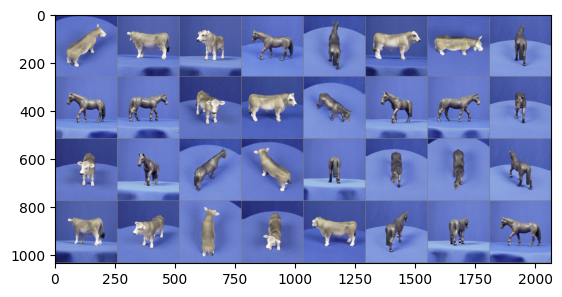

Cow   Cow   Cow   Horse Horse Cow   Cow   Horse Horse Horse Cow   Cow   Horse Horse Horse Horse Cow   Horse Horse Cow   Horse Horse Horse Horse Cow   Cow   Cow   Cow   Cow   Horse Horse Horse


In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
# Load the best model
model.load_state_dict(torch.load('/content/drive/MyDrive/MV/Model/Classification.pth'))

<All keys matched successfully>

**Train Accuracy**

In [ ]:
# Evaluation
model.eval()
train_correct = 0
with torch.no_grad():
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted = torch.round(outputs)
        train_correct += (predicted == labels.float().unsqueeze(1)).sum().item()

train_accuracy = train_correct / len(train_loader.dataset)
print(f'Train Accuracy: {train_accuracy:.4f}')

Train Accuracy: 0.9512


**Test Accuracy**

In [ ]:
# Evaluation
model.eval()
test_correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted = torch.round(outputs)
        test_correct += (predicted == labels.float().unsqueeze(1)).sum().item()

test_accuracy = test_correct / len(test_loader.dataset)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.6220


Ater evaluation, the model achieved the train accuracy of 95.1% but the test accuracy is really low i.e. 62.2% showing the poor performance of CNN because of limited dataset.

##**Predictions**

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted = torch.round(outputs)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predicted):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Cow   is 70.7 %
Accuracy for class: Horse is 53.7 %


After making prediction on each image sample, the individual classification accuracy for class cow is 70.7% and for horse it is 53.7%.

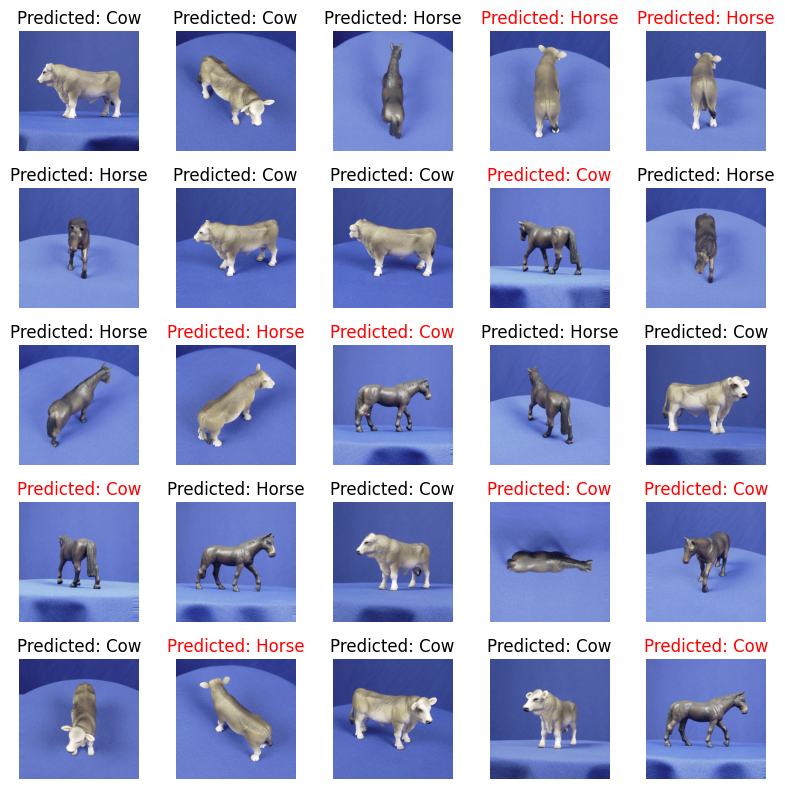

In [ ]:
import matplotlib.pyplot as plt

# Set up a subplot grid
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8, 8))
axes = axes.flatten()

# Set a counter to track the index of the axes
idx = 0

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted = torch.round(outputs)

        images = (images + 1)/2

        # Iterate through each image in the batch
        for i in range(len(images)):
            ax = axes[idx]
            image = images[i]
            label = labels[i]
            prediction = predicted[i]

            # Check if the prediction is correct or not
            if label == prediction:
                ax.imshow(image.permute(1, 2, 0).cpu().numpy())
                ax.set_title(f'Predicted: {classes[int(prediction)]}', color='black')
            else:
                ax.imshow(image.permute(1, 2, 0).cpu().numpy())
                ax.set_title(f'Predicted: {classes[int(prediction)]}', color='red')
            ax.axis('off')

            # Increment the index counter
            idx += 1
            if idx >= 25:  # Break the loop after displaying 10 images
                break

        if idx >= 10:  # Break the outer loop after displaying 10 images
            break

plt.tight_layout()
plt.show()


# **2nd Part: Generative Adversial Network (GAN)**

In this part, GAN was emloyed to generate fake images that resembels real training data in order to enhance the data and to improve classification accuracy.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from torchsummary import summary

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### **Dataset:**

#### **Data Loading**

Setting up a PyTorch dataset and data loader pipeline for training GAN.

1. A class 'CustomDataset' is defined to load and process the images in the dataset and it returns the length of the images in data and also returns images in the form of tensors after applying transformation.

2. Before feeding the images in to the GAN, they were resized to size 64 x 64 x 3 to reduce model complexity and training time.

3. All the images were converted into pytorch tensors (used normally in deep learning tasks of pytorch) and then normalized with 0.5 mean and standard deviation.

 *   transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5) means normalizing tensor with o.5 mean and 0.5 standard deviation for all three channels.

4. Then using pytorch utility 'torch.utils.data.DataLoader', dataloader is defined that iterates over the batches of data (here with batch size = 2, meaning each batch in data loader has two images)

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.img_names = os.listdir(root_dir)

    def __len__(self):
        return len(self.img_names)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.img_names[idx])
        image = Image.open(img_name).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image  # Returning a tensor instead of a list


# Define the path to your dataset
dataset_path = "/content/drive/MyDrive/MV/Data/Train/Cow"

transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = CustomDataset(root_dir=dataset_path, transform=transform)
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=2, shuffle=True)

####**Size of One Batch**

The variable 'dataloader' holds the entire training data in the form of batches. As total there are 41 images (for just cows) in the training data, so total batches are 41/2 = 21.

Number of batches in dataloader = 21 with size 2 x 64 x 64 x 3.

 * 2 indicating number of images in one batch of dataloader.   


In [ ]:
# Get a batch of training images
images = next(iter(dataloader))

# Check the size or dimensions of the batch of images
print("Size of the batch of images:", images.size())

Size of the batch of images: torch.Size([2, 3, 64, 64])


####**Visulizing Real Image fro Training Data**

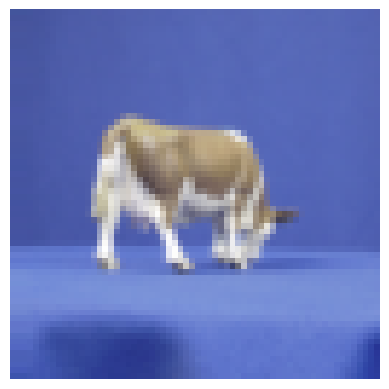

In [ ]:
images = next(iter(dataloader))
figsize=(2, 2)
image = images[0] / 2 + 0.5  # unnormalize
npimg = image.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.axis('off')

plt.show()

####**Number of Batches**

The data was saved in 'dataloader' in the form of batches. Iterating over dataloader gives the total number of batches.

In [ ]:
# Calculate total number of batches
total_batches = len(dataloader)

# Print total number of batches
print("Total number of batches:", total_batches)

Total number of batches: 21


### **Hyper-Parameters**

1. latent_dim = 100: Size of noise vector that is used by generator in GAN to generate fake images.

2. lr = 0.0002: Learning rate defined for generator and descriminator to determine the size of the step taken during optimization.

3. beta1 = 0.5, beta2 = 0.999: parameters for ADAM optimizer

4. num_epochs = 1000



In [ ]:
# Hyperparameters
latent_dim = 100
lr = 0.0002
beta1 = 0.5
beta2 = 0.999
num_epochs = 1000

### **GAN Model**

The Generative Adversarial Network (GAN) framework consists of two neural networks:
1. Generator  
2. Discriminator.

Both networks in GAN operate in a competitive manner, where the Generator aims to produce realistic images, while the Discriminator tries to distinguish between real and synthetic images. This adversarial training process encourages the Generator to continually improve its image generation capabilities, leading to the creation of high-quality synthetic images.


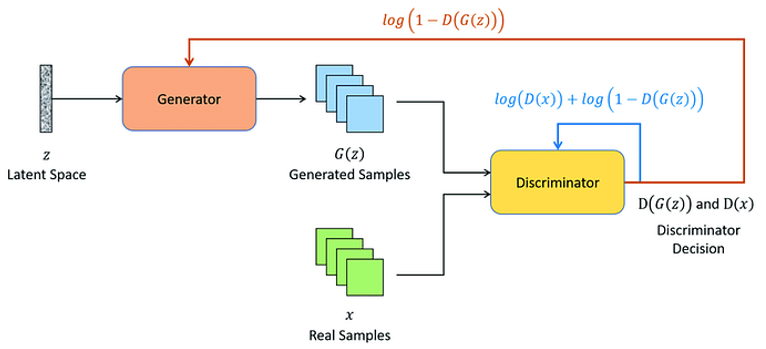

####**Generator**

The generator takes a noise vector of specified dimensions as input and uses a sequence of layers that transforms it into a synthetic image that resembles real data.

Using backpropagation technique, the generator gradually improves its ability to generate realistic images that closely resemble those in the training dataset.

1. The generator uses a series of convolution transpose layers, that causes upsampling, with batch normalization and ReLU activation function. Theses layers were added to increase the details and spatial dimensions of the input feature map.
5. In last there is tanh activation function that scales the output pixel values to the range [-1, 1], suitable for images.

In [ ]:
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(

            nn.ConvTranspose2d( latent_dim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d( 256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.ReLU(True),

            nn.ConvTranspose2d( 128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d( 64, 3, 4, 2, 1, bias=False),
            nn.Tanh()

        )

    def forward(self, z):
        return self.model(z)

####**Discriminator**

The role of discriminatoe is to evaluate the authenticity of images by distinguishing real and synthetic images.

1. It takes images from real data and images generated by the generator of size 64 x 64 x 3 as input and outputs a value indicating the probability that the image is real or fake.

2. To generate feature maps, series of convolutional layer with batch normalization, leaky relu activation function and drop out is used.

3. In general descriminator is just a CNN classifier that performs binary classification by classifying real and fake images. That's why in the end there is a flatten that converts the input tensor into 1D and then fully connected layer that performs linear transformation on the input data. In last layer softmax activation function is used to define a probability for the input image being fake or real.

In [ ]:
# Define the discriminator
class Discriminator(nn.Module):
	def __init__(self):
		super(Discriminator, self).__init__()
		self.model = nn.Sequential(
		nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
		nn.LeakyReLU(0.2),
		nn.Dropout(0.25),

		nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
		nn.ZeroPad2d((0, 1, 0, 1)),
		nn.BatchNorm2d(64, momentum=0.82),
		nn.LeakyReLU(0.25),
		nn.Dropout(0.25),

		nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
		nn.BatchNorm2d(128, momentum=0.82),
		nn.LeakyReLU(0.2),
		nn.Dropout(0.25),

		nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
		nn.BatchNorm2d(256, momentum=0.8),
		nn.LeakyReLU(0.25),
		nn.Dropout(0.25),

		nn.Flatten(),
		nn.Linear(256 * 9 * 9, 1),
		nn.Sigmoid()	)
	def forward(self, img):
		return self.model(img)

#### **Optimizers and Loss Function**

For training GAN, Binary cross entropy loss function is used that measures the dissimilarity between the actual labels and the predicted labels of the images, defined as follow where y defines the label and p(y) defines its probability.

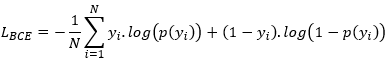

Furthermore, ADAM optimizer is used with default 0.0002 learning rate for both generator and descriminator.



In [ ]:
# Define the generator and discriminator
# Initialize generator and discriminator
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)
# Loss function
adversarial_loss = nn.BCELoss()
# Optimizers
optimizer_G = optim.Adam(generator.parameters()\
						, lr=lr, betas=(beta1, beta2))
optimizer_D = optim.Adam(discriminator.parameters()\
						, lr=lr, betas=(beta1, beta2))

####**Summary of Generator and Discriminator**

In [ ]:
summary(generator, ((100, 1, 1)))  # Assuming input size is (channels, height, width)
summary(discriminator, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1            [-1, 512, 4, 4]         819,200
       BatchNorm2d-2            [-1, 512, 4, 4]           1,024
              ReLU-3            [-1, 512, 4, 4]               0
   ConvTranspose2d-4            [-1, 256, 8, 8]       2,097,152
       BatchNorm2d-5            [-1, 256, 8, 8]             512
              ReLU-6            [-1, 256, 8, 8]               0
   ConvTranspose2d-7          [-1, 128, 16, 16]         524,288
       BatchNorm2d-8          [-1, 128, 16, 16]             256
              ReLU-9          [-1, 128, 16, 16]               0
  ConvTranspose2d-10           [-1, 64, 32, 32]         131,072
      BatchNorm2d-11           [-1, 64, 32, 32]             128
             ReLU-12           [-1, 64, 32, 32]               0
  ConvTranspose2d-13            [-1, 3, 64, 64]           3,072
             Tanh-14            [-1, 3,

### **Training**

The model was trained separately to generate more data for both classes.

For training the model:

1. Both models were trained separately and back propagation technique is usedto update their weights in order to improve their accuracies and to reduce their losses.


####**For Cows:**

In [ ]:
# Lists to store losses
d_losses = []
g_losses = []

# Training loop
for epoch in range(num_epochs):
	for i, batch in enumerate(dataloader):
	# Convert list to tensor
		real_images = batch

		# Adversarial ground truths
		valid = torch.full((real_images.size(0), ), 0.98, dtype=torch.float, device=device)
		fake = torch.full((real_images.size(0), ), 0, dtype=torch.float, device=device)
		# Configure input
		real_images = real_images.to(device)

		# ---------------------
		# Train Discriminator
		# ---------------------
		optimizer_D.zero_grad()
		# Sample noise as generator input
		z = torch.randn(real_images.size(0), latent_dim, 1, 1, device=device)
		# Generate a batch of images
		fake_images = generator(z)
		# Measure discriminator's ability
		# to classify real and fake images
		real_loss = adversarial_loss(discriminator\
									(real_images).view(-1), valid)
		fake_loss = adversarial_loss(discriminator\
									(fake_images.detach()).view(-1), fake)

		d_loss = (real_loss + fake_loss)/2
		# Backward pass and optimize
		d_loss.backward()
		optimizer_D.step()

		# -----------------
		# Train Generator
		# -----------------

		optimizer_G.zero_grad()
		# Generate a batch of images
		gen_images = generator(z)
		# Adversarial loss
		g_loss = adversarial_loss(discriminator(gen_images).view(-1), valid)
		# Backward pass and optimize
		g_loss.backward()
		optimizer_G.step()


		# ---------------------
		# Progress Monitoring
		# ---------------------
		if (i + 1) % 21 == 0:
			print(
				f"Epoch [{epoch+1}/{num_epochs}]\
						Batch {i+1}/{len(dataloader)} "
				f"Discriminator Loss: {d_loss.item():.4f} "
				f"Generator Loss: {g_loss.item():.4f}"
			)
			d_losses.append(d_loss.item())
			g_losses.append(g_loss.item())


	if (epoch + 1) % 10 == 0:
		torch.save(generator.state_dict(), f"/content/drive/MyDrive/MV/Batch1_cow/GAN_64_1batch_{epoch+1}_Cow.pth")
	# Save generated images for every epoch
	if (epoch + 1) % 20 == 0:
		with torch.no_grad():
			z = torch.randn(4, latent_dim, 1, 1, device=device)
			generated = generator(z).detach().cpu()
			grid = torchvision.utils.make_grid(generated,\
										nrow=2, normalize=True)
			plt.imshow(np.transpose(grid, (1, 2, 0)))
			plt.axis("off")
			plt.show()

# Plotting losses
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label="Discriminator Loss", color='r')
plt.plot(g_losses, label="Generator Loss", color='b')
plt.title("Training Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

####**For Horses:**

In [ ]:
# Lists to store losses
d_losses = []
g_losses = []

# Training loop
for epoch in range(num_epochs):
	for i, batch in enumerate(dataloader):
	# Convert list to tensor
		real_images = batch

		# Adversarial ground truths
		valid = torch.full((real_images.size(0), ), 0.98, dtype=torch.float, device=device)
		fake = torch.full((real_images.size(0), ), 0, dtype=torch.float, device=device)
		# Configure input
		real_images = real_images.to(device)

		# ---------------------
		# Train Discriminator
		# ---------------------
		optimizer_D.zero_grad()
		# Sample noise as generator input
		z = torch.randn(real_images.size(0), latent_dim, 1, 1, device=device)
		# Generate a batch of images
		fake_images = generator(z)
		# Measure discriminator's ability
		# to classify real and fake images
		real_loss = adversarial_loss(discriminator\
									(real_images).view(-1), valid)
		fake_loss = adversarial_loss(discriminator\
									(fake_images.detach()).view(-1), fake)

		d_loss = (real_loss + fake_loss)/2
		# Backward pass and optimize
		d_loss.backward()
		optimizer_D.step()

		# -----------------
		# Train Generator
		# -----------------

		optimizer_G.zero_grad()
		# Generate a batch of images
		gen_images = generator(z)
		# Adversarial loss
		g_loss = adversarial_loss(discriminator(gen_images).view(-1), valid)
		# Backward pass and optimize
		g_loss.backward()
		optimizer_G.step()


		# ---------------------
		# Progress Monitoring
		# ---------------------
		if (i + 1) % 21 == 0:
			print(
				f"Epoch [{epoch+1}/{num_epochs}]\
						Batch {i+1}/{len(dataloader)} "
				f"Discriminator Loss: {d_loss.item():.4f} "
				f"Generator Loss: {g_loss.item():.4f}"
			)
			d_losses.append(d_loss.item())
			g_losses.append(g_loss.item())


	if (epoch + 1) % 10 == 0:
		torch.save(generator.state_dict(), f"/content/drive/MyDrive/MV/Batch1_Horse/GAN_64_1batch_{epoch+1}_Horse.pth")
	# Save generated images for every epoch
	if (epoch + 1) % 20 == 0:
		with torch.no_grad():
			z = torch.randn(4, latent_dim, 1, 1, device=device)
			generated = generator(z).detach().cpu()
			grid = torchvision.utils.make_grid(generated,\
										nrow=2, normalize=True)
			plt.imshow(np.transpose(grid, (1, 2, 0)))
			plt.axis("off")
			plt.show()

# Plotting losses
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label="Discriminator Loss", color='r')
plt.plot(g_losses, label="Generator Loss", color='b')
plt.title("Training Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

### **Visuilizing Images**

For both classes the weights of generator were saved to generate more data. Here few images are generated to visualize their resolution and details.  

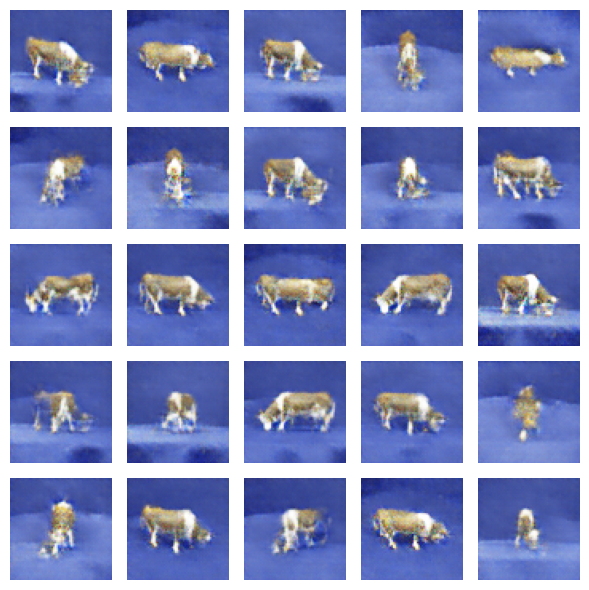

In [ ]:
num_images_to_generate = 5
# Initialize an empty list to store generated images
generated_images_list = []

for i in range(num_images_to_generate):
    with torch.no_grad():
        z = torch.randn(25, latent_dim, 1, 1, device=device)
        generated_batch = generator(z).detach().cpu()

        # Iterate through each image in the batch
        for j, generated_image in enumerate(generated_batch):
            # Denormalize the image
            generated_image = (generated_image * 0.5 + 0.5).clamp(0, 1)

            # Convert tensor to numpy array
            generated_image_np = generated_image.permute(1, 2, 0).numpy()

            # Append the generated image to the list
            generated_images_list.append(generated_image_np)

# Plotting the generated images in a subplot grid of 5x5
plt.figure(figsize=(6, 6))
for i in range(num_images_to_generate):
    for j in range(5):
        plt.subplot(num_images_to_generate, 5, i * 5 + j + 1)
        plt.imshow(generated_images_list[i * 5 + j])
        plt.axis('off')
plt.tight_layout()
plt.show()

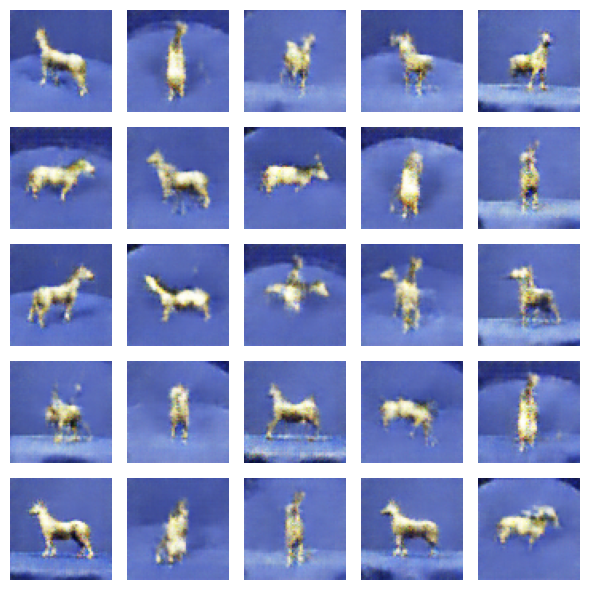

In [ ]:
num_images_to_generate = 5
# Initialize an empty list to store generated images
generated_images_list = []

for i in range(num_images_to_generate):
    with torch.no_grad():
        z = torch.randn(25, latent_dim, 1, 1, device=device)
        generated_batch = generator(z).detach().cpu()

        # Iterate through each image in the batch
        for j, generated_image in enumerate(generated_batch):
            # Denormalize the image
            generated_image = (generated_image * 0.5 + 0.5).clamp(0, 1)

            # Convert tensor to numpy array
            generated_image_np = generated_image.permute(1, 2, 0).numpy()

            # Append the generated image to the list
            generated_images_list.append(generated_image_np)

# Plotting the generated images in a subplot grid of 5x5
plt.figure(figsize=(6, 6))
for i in range(num_images_to_generate):
    for j in range(5):
        plt.subplot(num_images_to_generate, 5, i * 5 + j + 1)
        plt.imshow(generated_images_list[i * 5 + j])
        plt.axis('off')
plt.tight_layout()
plt.show()

Some images were discarded after saving because of their poor resolution and missing information.

### **Saving Generated Images**

Generated images were saved with size 256 x 256 x 3

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import torch

input_dim = 100  # Size of the noise vector used for generating images
generator.load_state_dict(torch.load('/content/drive/MyDrive/MV/Batch1_Horse/GAN_64_1batch_1000_Horse.pth'))
generator.eval()  # Set the model to evaluation mode

def generate_images(generator, num_images):
    noise = torch.randn(num_images, input_dim, 1, 1, device=device)
    generated_images = generator(noise).detach().cpu().numpy()

    return generated_images

num_images_to_generate = 1000
generated_images = generate_images(generator, num_images_to_generate)

# Normalize the images to [0, 1]
generated_images = (generated_images + 0.8) / 1.6

# Clip values to ensure they are in the [0, 1] range
generated_images = np.clip(generated_images, 0, 1)

# Create directory to save images if it doesn't exist
save_dir = '/content/drive/MyDrive/MV/Data/GAN/Horse'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)



# Save the generated images
for i in range(num_images_to_generate):
    plt.figure(figsize=(3.3339, 3.3339))  # Set figsize to 256x256 pixels

    # If the image is grayscale
    if generated_images[i].shape[0] == 1:
        plt.imshow(generated_images[i].squeeze(), cmap='gray', vmin=0, vmax=1)
    # If the image is RGB
    else:
        plt.imshow(np.transpose(generated_images[i], (1, 2, 0)), vmin=0, vmax=1)

    plt.axis('off')
    plt.gca().set_aspect('equal')  # Set aspect ratio to be equal

    # Save the image without white border
    image_path = os.path.join(save_dir, f'GAN_Horse_049_{i}.png')
    plt.savefig(image_path, bbox_inches='tight', pad_inches=0)

    plt.close()  # Close the current figure to free up memory


# **3rd Part: CNN Classifier after GAN**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import os
import torch.nn as nn
import torchvision
import torch.optim as optim
import numpy as np
from torchsummary import summary
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In the third part, clasification task was performed again by adding new data to real training data, generated by GAN, to improve the classification accuracy of CNN classifier.

## **Dataset:**

For this image classification task, new data was added that was generated by GAN for two classes: cows and horses. Training data:

     Classes                    Horse        Cow
     Total Image Samples         531         531

82 real images + 980 new generated images for both classes.

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

### **Data Loading & Generating Labels**

**Generating Labels**

For supervised learning task, ML algorithms use labeled datasets to train algorithms, to predict outcomes and recognize patterns.

For the CNN classification task, label 0 was assigned to the class 'cow,' and label 1 was assigned to the class 'horse,' enabling binary classification between these two classes.


In [ ]:
train_data_dir = '/content/drive/MyDrive/MV/Data/GAN'
classes = ['Cow', 'Horse']
train_images = []
train_labels = []

for i, class_name in enumerate(classes):
    class_dir = os.path.join(train_data_dir, class_name)
    for image_name in os.listdir(class_dir):
        image = Image.open(os.path.join(class_dir, image_name))
        image = image.convert('RGB')
        image = image.resize((256, 256))
        image = np.array(image)
        train_images.append(image)
        train_labels.append(i)


# Convert to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
test_data_dir = '/content/drive/MyDrive/MV/Data/Test'
classes = ['Cow', 'Horse']

test_images = []
test_labels = []

for i, class_name in enumerate(classes):
    class_dir = os.path.join(test_data_dir, class_name)
    for image_name in os.listdir(class_dir):
        image = Image.open(os.path.join(class_dir, image_name))
        image = np.array(image)
        test_images.append(image)
        test_labels.append(i)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

**Normalization**

Initially the pixels of images were in range [0, 255]. So to reduce model complexity and to enhance training stability all the images were normalized between the range [0, 1].

In [ ]:
batch_size = 64

# Convert images to PyTorch tensors and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = CustomDataset(train_images, train_labels, transform=transform)
test_dataset = CustomDataset(test_images, test_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size, shuffle=True)

####**Visulaizing Training Data (Real + Fake)**

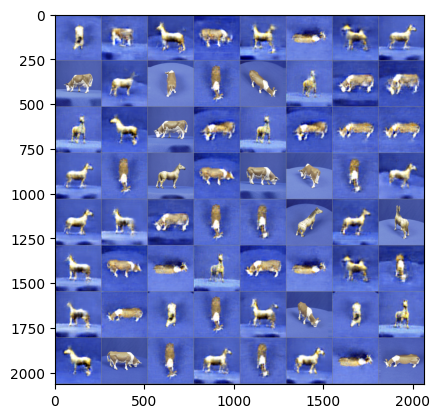

Horse Cow   Horse Cow   Horse Cow   Horse Horse Cow   Horse Cow   Cow   Cow   Horse Cow   Cow   Horse Horse Cow   Cow   Horse Cow   Cow   Cow   Horse Cow   Horse Cow   Cow   Cow   Cow   Horse Horse Horse Cow   Cow   Cow   Horse Horse Horse Horse Cow   Cow   Horse Cow   Cow   Horse Cow   Horse Cow   Horse Cow   Horse Cow   Horse Horse Horse Cow   Cow   Horse Cow   Horse Cow   Cow  


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

##**CNN Architecture**


### **CNN Architecture**


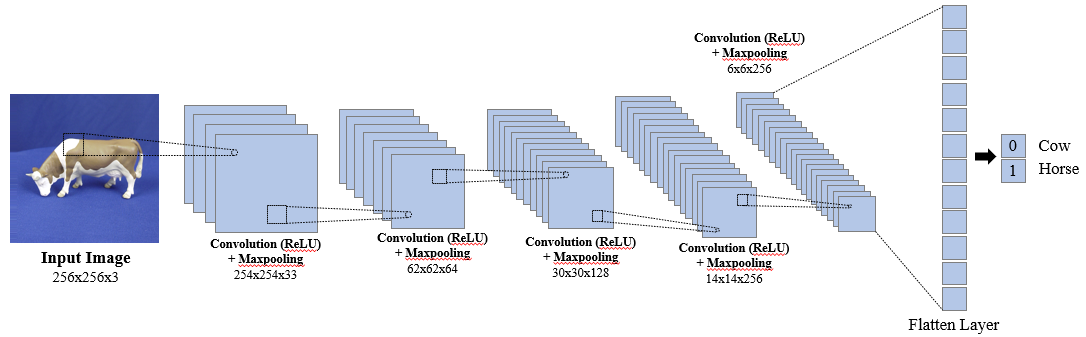

*   In CNN, Convolution layer with relu acutuvation function is used that is
followed by a max pooling layer.

1. For this classification task, same CNN architecture was used but with few more dropout layers to mitigate overfitting

In [ ]:
# Define the CNN architecture in PyTorch
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.relu1 = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.relu2 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(128 * 30 * 30, 512)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool1(self.dropout(self.relu1(self.conv1(x))))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = x.view(-1, 128 * 30 * 30)
        x = self.dropout(self.relu4(self.fc1(x)))
        x = self.sigmoid(self.fc2(x))
        return x

In [ ]:
# Initialize the model
model = CNN()

In [ ]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=115200, out_features=512, bias=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
summary(model, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 254, 254]             896
              ReLU-2         [-1, 32, 254, 254]               0
           Dropout-3         [-1, 32, 254, 254]               0
         MaxPool2d-4         [-1, 32, 127, 127]               0
            Conv2d-5         [-1, 64, 125, 125]          18,496
              ReLU-6         [-1, 64, 125, 125]               0
         MaxPool2d-7           [-1, 64, 62, 62]               0
            Conv2d-8          [-1, 128, 60, 60]          73,856
              ReLU-9          [-1, 128, 60, 60]               0
        MaxPool2d-10          [-1, 128, 30, 30]               0
           Linear-11                  [-1, 512]      58,982,912
             ReLU-12                  [-1, 512]               0
          Dropout-13                  [-1, 512]               0
           Linear-14                   

####**Hyperparameters**

Same hyperparameters were used i.e Adam optimizer with 0.001 learning rate  and BCE loss.

In [ ]:
# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

###**Training**

In [ ]:
import numpy as np

# Define variables for early stopping
best_test_loss = float('inf')
patience = 3  # Number of epochs to wait if validation loss stops decreasing
counter = 0  # Counter for how many epochs validation loss has not decreased

train_losses = []
test_losses = []

num_epochs = 20
for epoch in range(num_epochs):
    train_loss = 0.0
    model.train()  # Set the model to training mode
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.float().unsqueeze(1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)

    # Test the model
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.float().unsqueeze(1))
            test_loss += loss.item() * images.size(0)

    # Calculate average losses
    train_loss = train_loss / len(train_loader.dataset)
    test_loss = test_loss / len(test_loader.dataset)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # Check for early stopping
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Test loss has not decreased for {} epochs. Early stopping...".format(patience))
            break


Epoch 1/20, Train Loss: 0.5097, Test Loss: 0.8337
Epoch 2/20, Train Loss: 0.0352, Test Loss: 0.6974
Epoch 3/20, Train Loss: 0.0165, Test Loss: 0.6206
Epoch 4/20, Train Loss: 0.0015, Test Loss: 0.7159
Epoch 5/20, Train Loss: 0.0021, Test Loss: 1.0356
Epoch 6/20, Train Loss: 0.0007, Test Loss: 0.7971
Test loss has not decreased for 3 epochs. Early stopping...


Early stopping is ued to avoid overfitting. It monitors the test loss and automatically stops the training if there is not any further improvement in the test_loss upto 3 epochs as patience=3.

Model was trained for 20 epochs but due to early stopping, the training stopped at 6 epochs (to avoid overfitting).

###**Train-Val Loss**

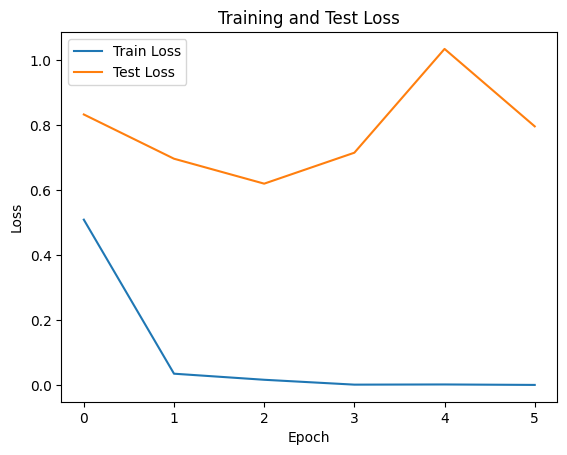

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

With increase in epochs, training lost almost reaches close to zero i.e. 0.0007 but there is no further improvement in test loss.

##**Evaluation**

In [ ]:
PATH = '/content/drive/MyDrive/MV/Model/Classification.pth'
torch.save(model.state_dict(), PATH)

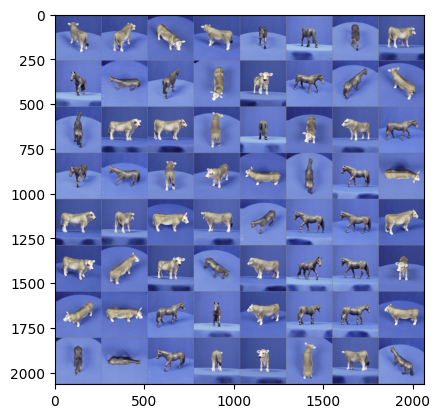

Cow   Cow   Cow   Cow   Horse Horse Horse Cow   Horse Horse Horse Cow   Cow   Horse Horse Cow   Horse Cow   Cow   Cow   Horse Cow   Cow   Horse Horse Horse Cow   Cow   Cow   Horse Horse Cow   Cow   Cow   Cow   Cow   Horse Horse Horse Cow   Cow   Cow   Cow   Horse Cow   Horse Horse Cow   Cow   Cow   Horse Horse Cow   Horse Horse Cow   Horse Horse Horse Cow   Cow   Cow   Cow   Horse


In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
# Load the best model
model.load_state_dict(torch.load('/content/drive/MyDrive/MV/Model/Classification.pth'))

<All keys matched successfully>

In [ ]:
# Evaluation
model.eval()
train_correct = 0
with torch.no_grad():
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted = torch.round(outputs)
        train_correct += (predicted == labels.float().unsqueeze(1)).sum().item()

train_accuracy = train_correct / len(train_loader.dataset)
print(f'Train Accuracy: {train_accuracy:.4f}')

Train Accuracy: 1.0000


In [ ]:
# Evaluation
model.eval()
test_correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted = torch.round(outputs)
        test_correct += (predicted == labels.float().unsqueeze(1)).sum().item()

test_accuracy = test_correct / len(test_loader.dataset)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.7439


Ater evaluation, the train accuracy is 100% while the test data has achieved 74.3%. The accuracy is improved by adding more data using GAN.

##**Predictions**

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted = torch.round(outputs)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predicted):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Cow   is 82.9 %
Accuracy for class: Horse is 65.9 %


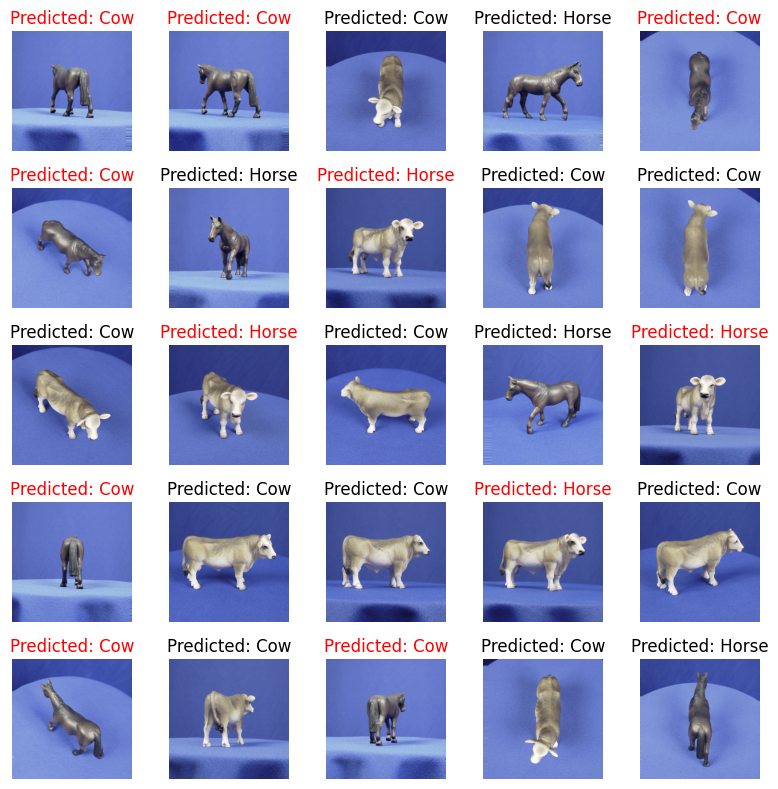

In [ ]:
import matplotlib.pyplot as plt

# Set up a subplot grid
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8, 8))
axes = axes.flatten()

# Set a counter to track the index of the axes
idx = 0

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted = torch.round(outputs)

        images = (images + 1)/2

        # Iterate through each image in the batch
        for i in range(len(images)):
            ax = axes[idx]
            image = images[i]
            label = labels[i]
            prediction = predicted[i]

            # Check if the prediction is correct or not
            if label == prediction:
                ax.imshow(image.permute(1, 2, 0).cpu().numpy())
                ax.set_title(f'Predicted: {classes[int(prediction)]}', color='black')
            else:
                ax.imshow(image.permute(1, 2, 0).cpu().numpy())
                ax.set_title(f'Predicted: {classes[int(prediction)]}', color='red')
            ax.axis('off')

            # Increment the index counter
            idx += 1
            if idx >= 25:  # Break the loop after displaying 10 images
                break

        if idx >= 10:  # Break the outer loop after displaying 10 images
            break

plt.tight_layout()
plt.show()


Still after predicting model on unseen data, there is some misclassification but atleast it is improved from the previous one i.e. 62%.

So, it is concluded that with increase in data we can improve the accuracy of machine learning problem and to mitigate the problem of limited dataset, GANs are the best option.